In [9]:
import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
dataset=pd.read_csv('Chapter9_NPV Data Set.csv')
X=dataset.iloc[:,0:6]
y=dataset.iloc[:,6].values
print(dataset.describe())
seed=15
np.random.seed(seed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y,
test_size=0.2)

        Porosity  Permeability(md)  Fracture-Half Length(ft)  \
count  38.000000         38.000000                 38.000000   
mean    0.061579          0.000292                300.000000   
std     0.016526          0.000191                 83.827364   
min     0.040000          0.000050                200.000000   
25%     0.042500          0.000050                200.000000   
50%     0.060000          0.000295                300.000000   
75%     0.080000          0.000500                400.000000   
max     0.080000          0.000500                400.000000   

       Fracture Conductivity(md-ft)  Fracture Spacing(ft)  Well Distance(ft)  \
count                     38.000000             38.000000          38.000000   
mean                      24.842105             65.526316         757.894737   
std                       19.130457             25.542478         198.142153   
min                        1.000000             10.000000         500.000000   
25%                    

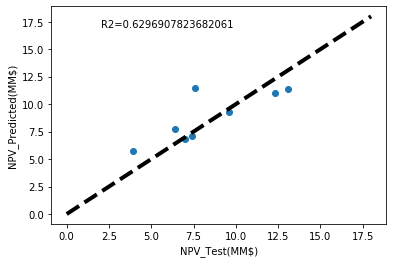

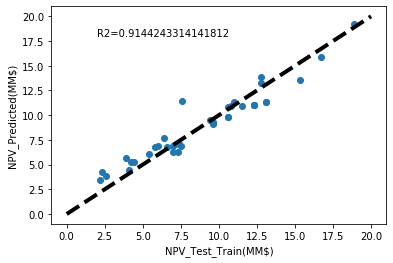

In [10]:
#Making Polynomial Model with Lasso parameters for the regression,
#and cross validation with 4 folds
model=make_pipeline(MinMaxScaler(),PolynomialFeatures(3,
interaction_only=False), LassoCV(eps=0.0005,n_alphas=10,
max_iter=10000, normalize=True,cv=4))
model.fit(X_train,y_train)
#Predicting the outputs and calculating R2s
y_pred_Test=np.array(model.predict(X_test))
test_scoreTest=model.score(X_test,y_test)
y_Pred_Test_Train=np.array(model.predict(X))
test_scoreTest_Train=model.score(X,y)
#Plotting the Outputs
fig, ax=plt.subplots()
ax.scatter(y_test,y_pred_Test)
ax.plot([0, 18], [0, 18], 'k--', lw=4)
ax.set_xlabel('NPV_Test(MM$)')
ax.set_ylabel('NPV_Predicted(MM$)')
plt.text(2,17,"R2="+str(test_scoreTest).format("%.2f"))
plt.show()
fig, ax=plt.subplots()
ax.scatter(y,y_Pred_Test_Train)
ax.plot([0, 20], [0, 20], 'k--', lw=4)
ax.set_xlabel('NPV_Test_Train(MM$)')
ax.set_ylabel('NPV_Predicted(MM$)')
plt.text(2,18,"R2="+str(test_scoreTest_Train ).format("%.2f"))
plt.show()

Text(0.5, 0.92, 'NPV(MM$)')

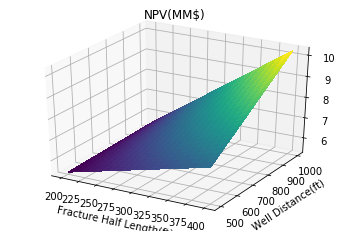

In [11]:
# Plot 3D surface for variable Fracture half-length(FH) and Well
#Distance(WD)
from mpl_toolkits.mplot3d import axes3d
n=20
m=25
FH_vals=np.linspace(200,400,n+1)
WD_vals=np.linspace(500,1000,m+1)
FH,WD=np.meshgrid(FH_vals, WD_vals)
z=np.zeros_like(FH)
item=np.array([0.0]*6)
item[0]=.06
item[1]= 10e-05
item[3]=26
item[4]=40
for i in range(m+1):
    for j in range(n+1):
        item[2]=FH[i,j]
        item[5]=WD[i,j]
        z[i,j]=model.predict(item.reshape(1,-1))
fig=plt.figure()
#adding 3d for subplot 1,1,1
ax0=fig.add_subplot(111, projection='3d')
surf=ax0.plot_surface(FH,WD, z, rstride=1, cstride=1,
cmap='viridis', linewidth=0, antialiased=False)
ax0.set_xlabel('Fracture Half Length(ft)')
ax0.set_ylabel('Well Distance(ft)')
ax0.set_title('NPV(MM$)')

In [12]:
from pyswarm import pso
theta=10e-10
lb=np.array([0.06, 10e-05, 200, 26, 40, 500])
ub=np.array([0.06, 10e-05, 400, 26, 40, 1000])
ub += theta
def f(X):
    return -model.predict(X.reshape(1,-1))
xopt, fopt=pso(f, lb, ub,swarmsize=200, omega=0.3, phip=.5,
phig=0.7, maxiter=1000, minstep=1e-8)
print(xopt)
print(fopt)

Stopping search: Swarm best position change less than 1e-08
[6.00000007e-02 1.00000550e-04 4.00000000e+02 2.60000000e+01
 4.00000000e+01 1.00000000e+03]
[-10.26411204]
